In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


## Installing the Roboflow package and downloading the dataset


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="em5rvDa1OU3rANy17SjJ")
project = rf.workspace("abdelrahman-mohamed-mtrjl").project("egyptian-ids-frontside")
dataset = project.version(1).download("yolov8")

In [ ]:
dataset.location

'/Egyptian-IDs-frontside-1'

##Install and import the required packages and libraries to train YOLOv8

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)



## Training YOLOv8m-seg on my custom dataset for instance segmentation

In [ ]:
!yolo task=segment mode=train model=yolov8m-seg.pt data=/Egyptian-IDs-frontside-1/data.yaml epochs=40 imgsz=640

100% 52.4M/52.4M [00:00<00:00, 262MB/s]
New https://pypi.org/project/ultralytics/8.1.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/Egyptian-IDs-frontside-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

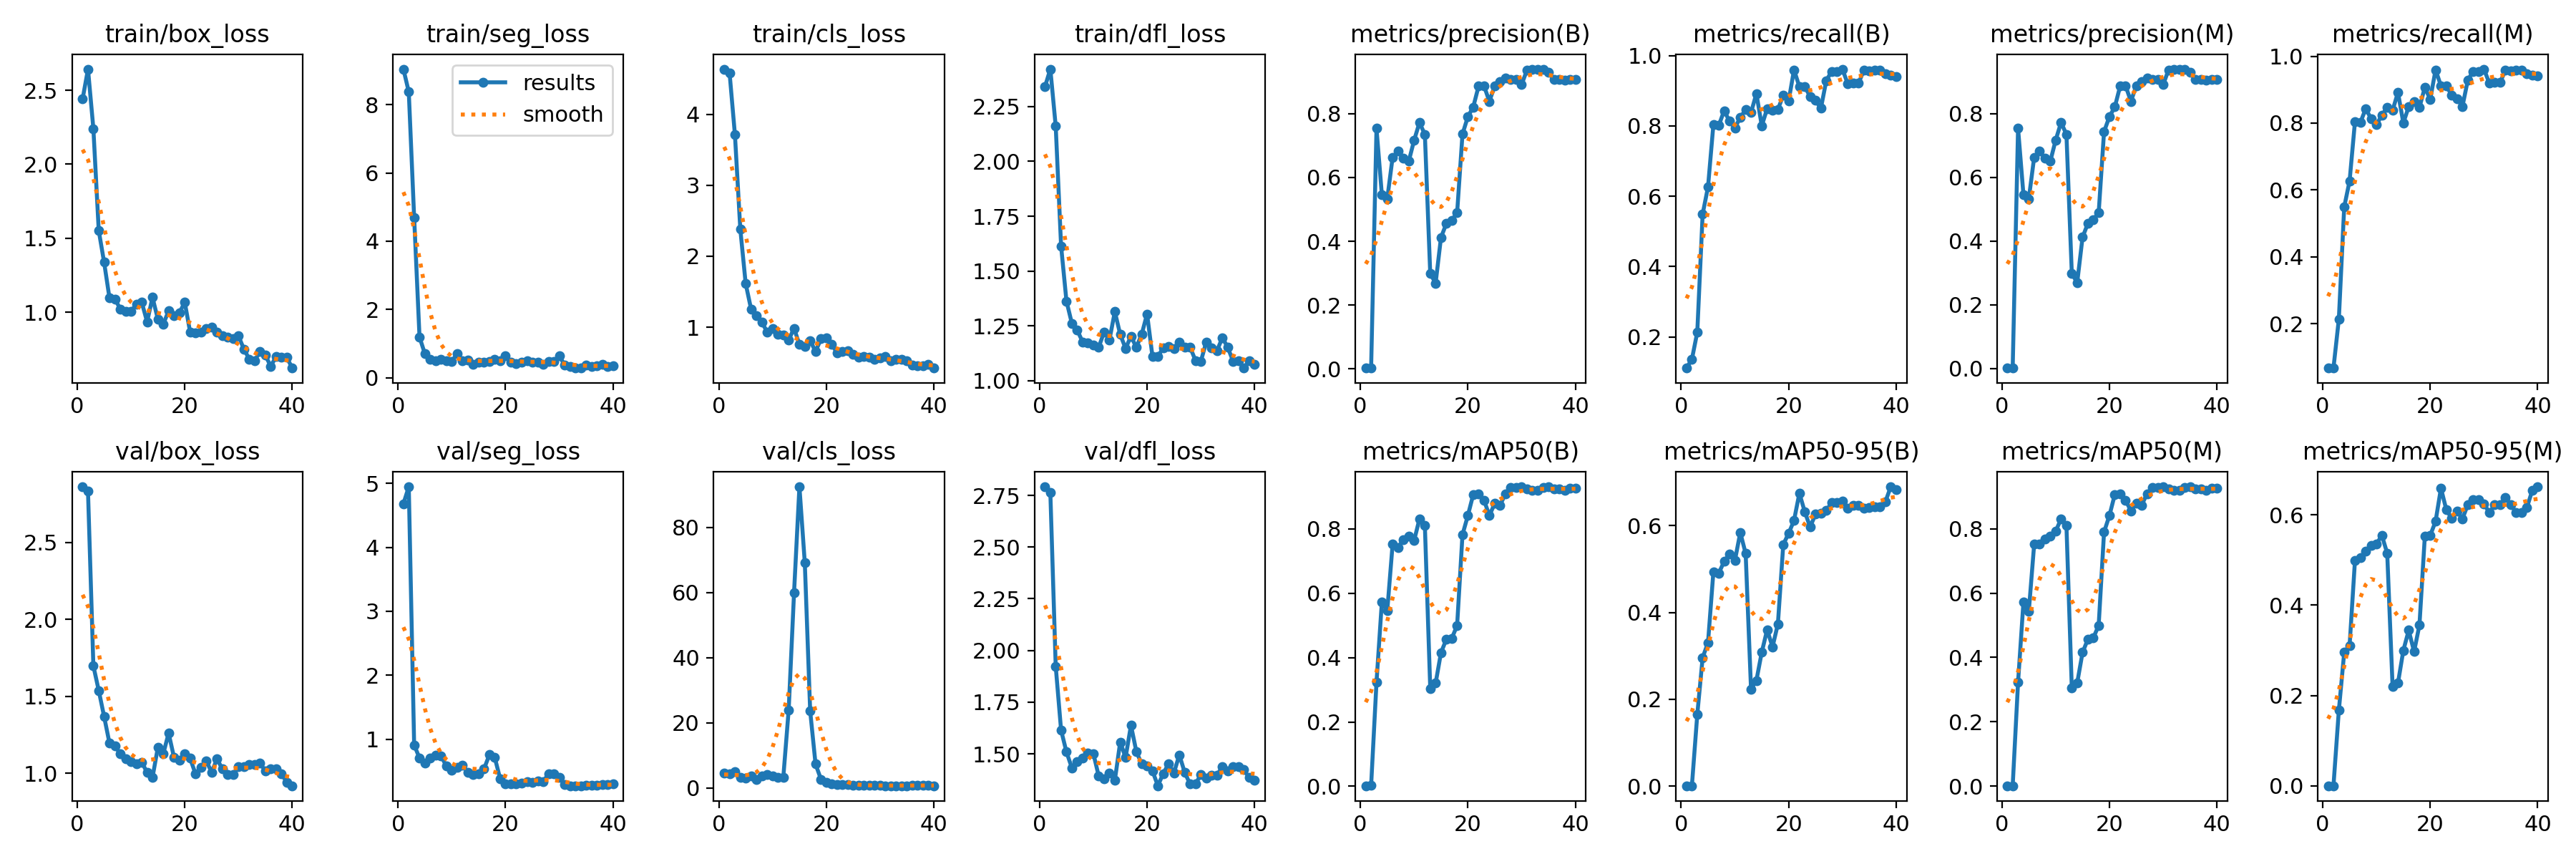

In [ ]:
Image(filename=f'/runs/segment/train/results.png', width=1000)

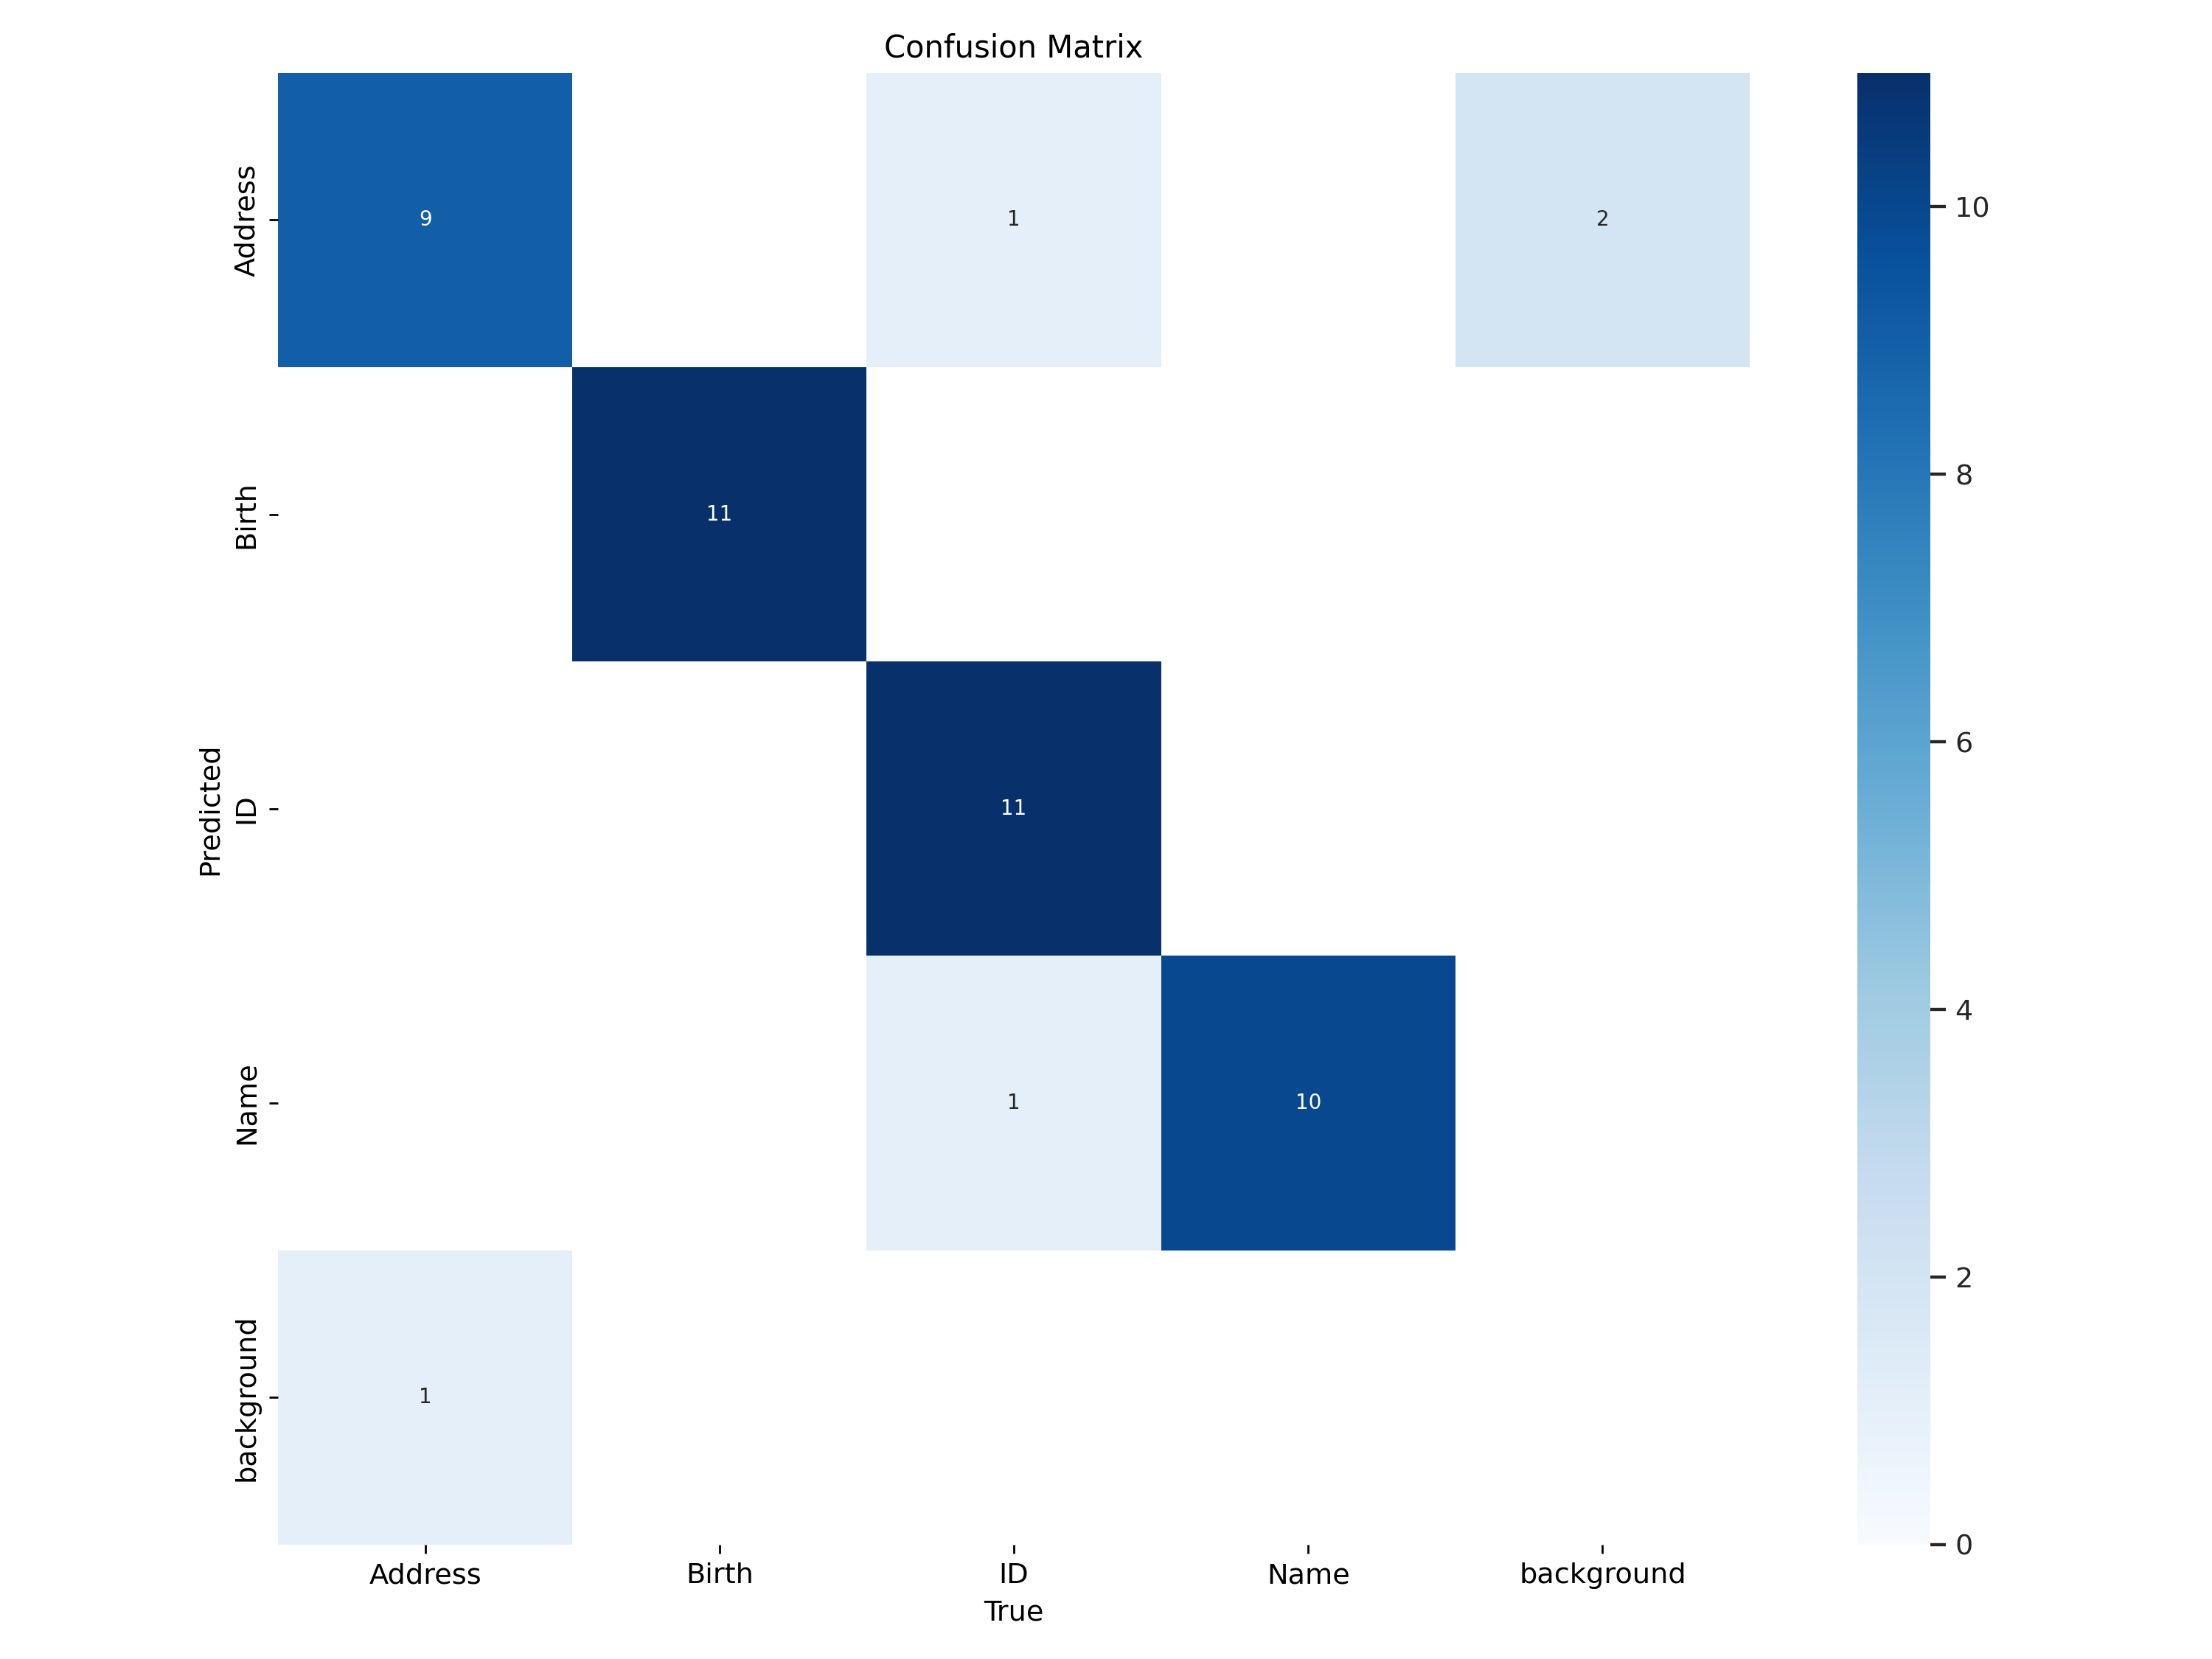

In [ ]:
Image(filename=f'/runs/segment/train/confusion_matrix.png', width=600)

In [ ]:
!yolo task=segment mode=predict model=/content/gdrive/MyDrive/YOLOV4/backup/best.pt conf=0.25 source=/content/gdrive/MyDrive/YOLOV4/test.jpg save=true

## Testing the model after training by 2 Egyptian IDs images

In [ ]:
!yolo task=segment mode=predict model=/content/gdrive/MyDrive/YOLOV4/backup/best.pt conf=0.25 source=/content/gdrive/MyDrive/YOLOV4/t.jpg save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/gdrive/MyDrive/YOLOV4/t.jpg: 480x640 1 Address, 1 Birth, 1 ID, 1 Name, 152.5ms
Speed: 4.7ms preprocess, 152.5ms inference, 518.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=segment mode=predict model=/content/gdrive/MyDrive/YOLOV4/backup/best.pt conf=0.25 source=/content/gdrive/MyDrive/YOLOV4/testt.jpg save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gdrive/MyDrive/YOLOV4/testt.jpg: 480x640 1 Address, 1 Birth, 1 ID, 1 Name, 166.7ms
Speed: 4.3ms preprocess, 166.7ms inference, 859.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


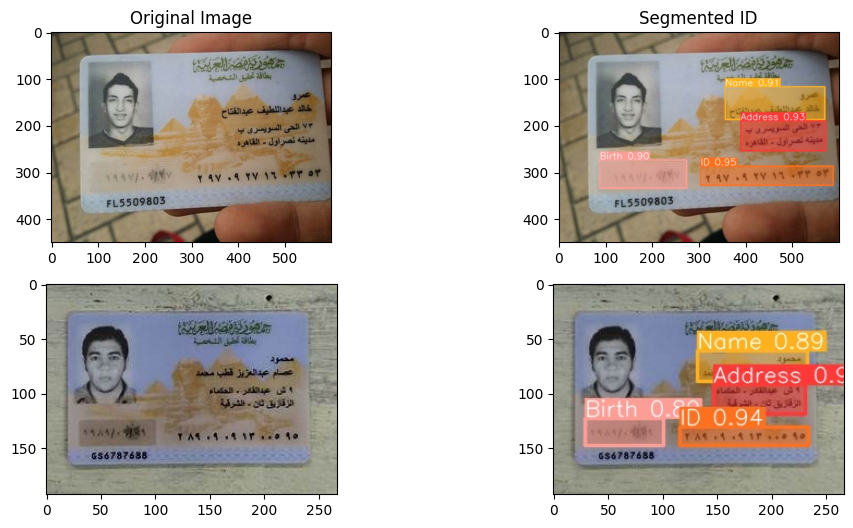

In [ ]:
path = '/content/gdrive/MyDrive/YOLOV4/t.jpg'
path_2 = '/content/gdrive/MyDrive/YOLOV4/testt.jpg'
path_segment ='/runs/segment/predict2/t.jpg'
path_segment2 = '/runs/segment/predict6/testt.jpg'

img= cv2.imread(path)
img_2 =cv2.imread(path_2)
segmented_img =cv2.imread(path_segment)
segmented_img_2 =cv2.imread(path_segment2)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.title('Segmented ID')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(segmented_img_2, cv2.COLOR_BGR2RGB))

plt.show()